<a href="https://colab.research.google.com/github/SOUMEE2000/Natural-Language-Processing/blob/main/Using%20NNs%20and%20CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Neural Networks**

In [ ]:
import tensorflow.keras as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


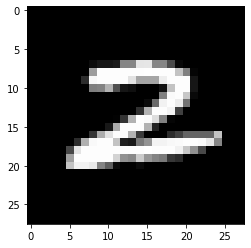

In [ ]:
plt.imshow(xtrain[199],cmap='gray')
plt.show()

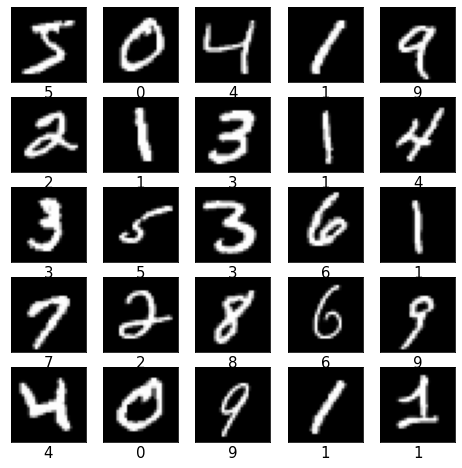

In [ ]:
plt.figure(figsize=((8,8)))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(ytrain[i], fontsize=15)
  plt.imshow(xtrain[i],cmap='gray')
plt.show()



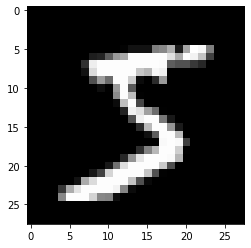

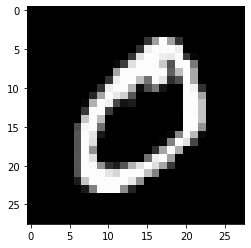

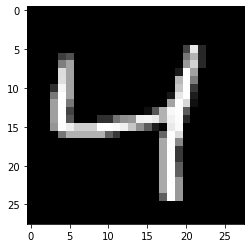

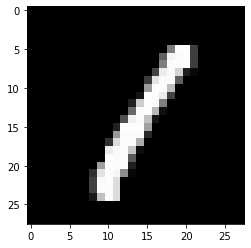

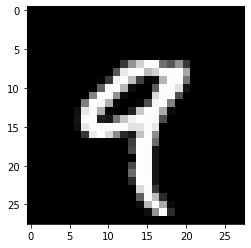

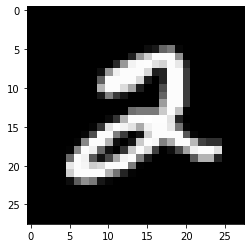

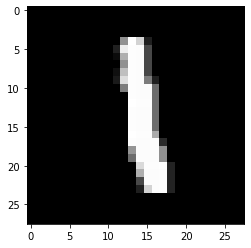

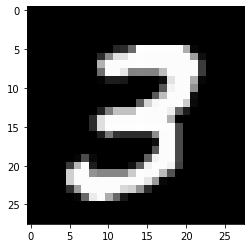

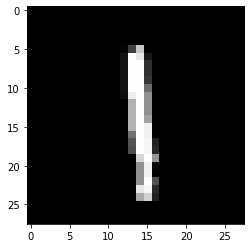

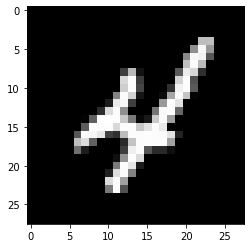

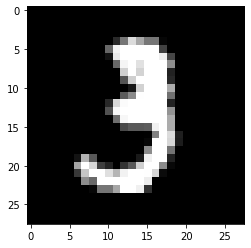

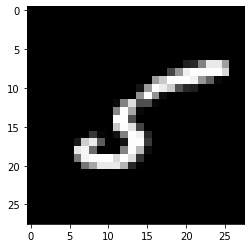

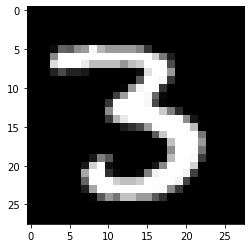

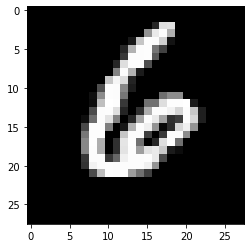

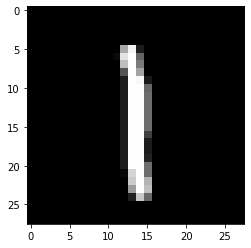

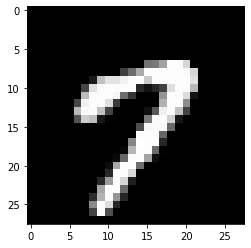

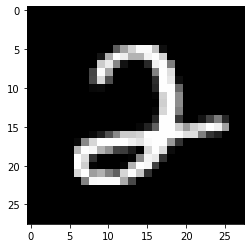

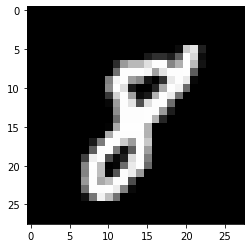

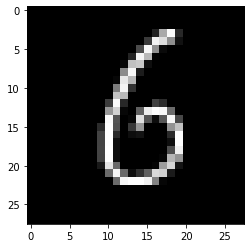

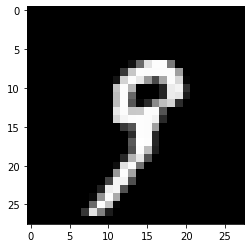

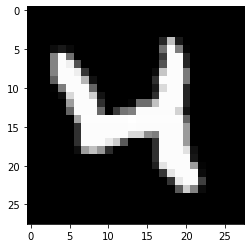

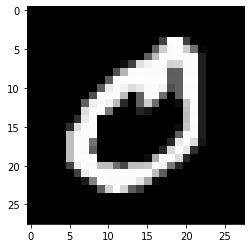

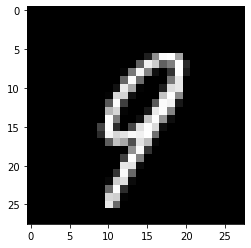

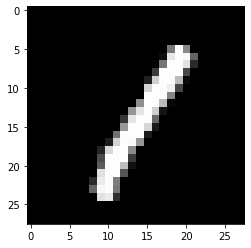

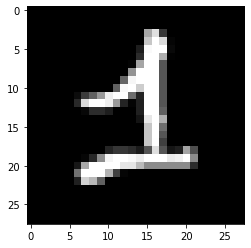

In [ ]:
for i in range(0,25):
  plt.imshow(xtrain[i],cmap='gray')
  plt.show()

In [ ]:
# Neural Network
model = tf.models.Sequential()

In [ ]:
#Add the layers
model.add(tf.layers.Flatten())                             #Input
model.add(tf.layers.Dense(784,activation='relu'))          #Hidden
model.add(tf.layers.Dense(10, activation='softmax'))       #Output

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy'
                ,metrics=['accuracy']) #adam name for gradient descent

In [ ]:
xtrain= xtrain/255
xtest= xtest/255
#Scaling 

In [ ]:
trained_model= model.fit(xtrain, ytrain, epochs=14, batch_size=35)

Epoch 1/14
1715/1715 [==============================] - 5s 2ms/step - loss: 0.3200 - accuracy: 0.9039
Epoch 2/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0793 - accuracy: 0.9765
Epoch 3/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9853
Epoch 4/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0311 - accuracy: 0.9901
Epoch 5/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 6/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9940
Epoch 7/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0145 - accuracy: 0.9951
Epoch 8/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 9/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 10/14
1715/1715 [==============================] - 3s 2ms/step - loss: 0.011

In [ ]:
ypred = model.predict(xtest)

In [ ]:
ypred[200]  #Gives a list of probabilities of the output layer

array([1.3091699e-16, 2.4221833e-13, 2.3203151e-08, 9.9999988e-01,
       2.7248777e-20, 6.8398009e-10, 2.4739094e-15, 2.5831051e-14,
       1.4501694e-07, 1.4000010e-12], dtype=float32)

In [ ]:
np.argmax(ypred[200])

3

In [ ]:
ytest[200]

3

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.0899 - accuracy: 0.9829


[0.08990508317947388, 0.9829000234603882]

In [ ]:
np.argmax(ypred)

7

# **Using Convolutional Neural Networks**



In [12]:
# importing tensorflow
import tensorflow as tf

In [13]:
# accessing the data
mnist=tf.keras.datasets.mnist

In [14]:
# loading the data
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

In [15]:
# shape of the training dataset
X_train.shape

(60000, 28, 28)

In [16]:
import matplotlib.pyplot as plt

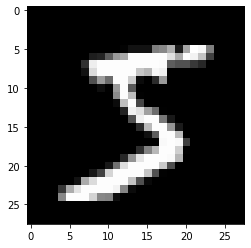

In [17]:
# the first image of the training set 
plt.imshow(X_train[0], cmap="gray")

In [18]:
# Normalise the data. The data was basically a 2-d array with values between 0 and 255. Dividing by 255 leads the values to between 0 and 1.
X_trainr=X_train/255
X_testr=X_test/255

In [19]:
import numpy as np
img_size=28
X_trainr= np.array(X_trainr).reshape(-1, img_size,img_size,1)
X_testr= np.array(X_testr).reshape(-1, img_size,img_size,1)

In [20]:
X_trainr.shape

(60000, 28, 28, 1)

In [21]:
# Importing necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [66]:
model=Sequential()

# 1st convolutional layer.
model.add(Conv2D(64,(3,3), input_shape= X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd convolutional layer.
model.add(Conv2D(64,(3,3), input_shape= X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolutional layer
model.add(Conv2D(64,(3,3), input_shape= X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [67]:
# Gives a summary of the model.
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
activation_54 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_55 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 3, 3, 64)        

In [77]:
# Compiling and fitting the model on the training data. The hyperparameters loss, optimizer and metrics are taken care of.

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_trainr, Y_train, epochs=15, validation_split=0.3) 

# After running a coiple of different models these are the hyperparameters that seem to suit it best.
# A validation split of more than 0.3 causes overfitting as the test accuracy decreases a lot while the training accuracy increases.
# More number of epochs doesn't increase the accuracy.

Epoch 1/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.1040 - val_accuracy: 0.9868
Epoch 2/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1054 - val_accuracy: 0.9878
Epoch 3/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.1064 - val_accuracy: 0.9864
Epoch 4/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.0902 - val_accuracy: 0.9885
Epoch 5/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.1061 - val_accuracy: 0.9882
Epoch 6/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1255 - val_accuracy: 0.9863
Epoch 7/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0994 - val_accuracy:

In [ ]:
# Validation accuracy should be approximately equal to training accuracy, otherwise ovefitting.
# Here we are trying to split the test set into validation and training set.

In [78]:
# Test set data
test_loss, test_accuracy= model.evaluate(X_testr, Y_test)
print("Test accuracy is", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9895
Test accuracy is 0.9894999861717224
